Import all the required libraries to execute the project

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px

from sklearn import preprocessing
from sklearn import tree
from sklearn import svm
from sklearn import metrics

from sklearn.manifold import TSNE
from sklearn.decomposition import  PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import HuberRegressor

from xgboost import XGBClassifier

warnings.filterwarnings('ignore')

Read the human activity recognition dataset and form a dataframe

In [2]:
url = 'https://drive.google.com/uc?id=18AYGjJRw8NWg3VAlnpvk0msWNQc7OitK'
Syn_data = pd.read_csv(url, encoding='latin-1')

np.random.seed(123)
random_noise = np.random.normal(0, 0.35, size=len(Syn_data))
Syn_data['Health_idx'] += random_noise

X = Syn_data.iloc[:,[1,2,3,4,5,6]]
y = Syn_data.iloc[:,[7]]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

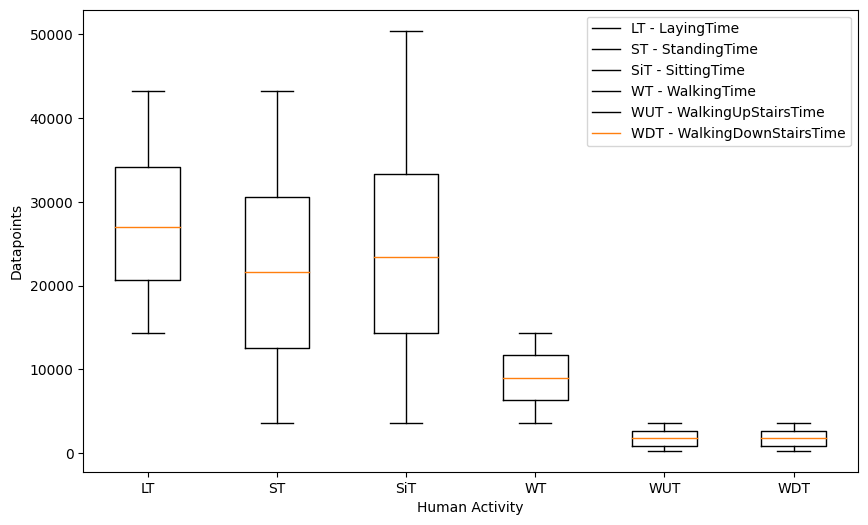

In [3]:
plt.figure(figsize=(10,6), dpi=100)
x1 = [1, 2, 3, 4, 5, 6]
data = [Syn_data["LayingTime"],Syn_data["StandingTime"],Syn_data["SittingTime"],Syn_data["WalkingTime"],Syn_data["WalkingUpStairsTime"],Syn_data["WalkingDownStairsTime"]]
plt.boxplot(data)
plt.xlabel('Human Activity')
plt.xticks(ticks = x1, labels=["LT", "ST", "SiT", "WT", "WUT", "WDT"])
plt.legend(["LT - LayingTime", "ST - StandingTime", "SiT - SittingTime", "WT - WalkingTime", "WUT - WalkingUpStairsTime", "WDT - WalkingDownStairsTime"])
plt.ylabel('Datapoints')
plt.show()

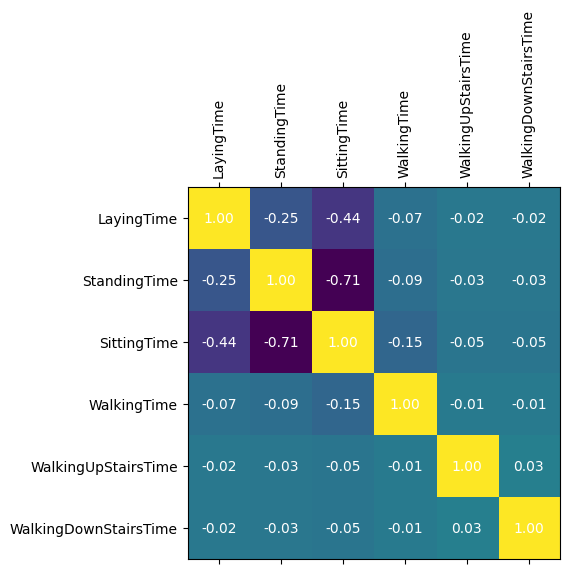

<Figure size 640x480 with 0 Axes>

In [4]:
correlation = X.corr()

plt.matshow(correlation)
x1 = [0, 1, 2, 3, 4, 5]
for (xId, yId), value in np.ndenumerate(correlation):
  plt.text(xId, yId, f"{value:.2f}", va="center", ha="center", color="white")
plt.xticks(ticks = x1, labels=["LayingTime", "StandingTime", "SittingTime", "WalkingTime", "WalkingUpStairsTime", "WalkingDownStairsTime"], rotation ='vertical')
plt.yticks(ticks = x1, labels=["LayingTime", "StandingTime", "SittingTime", "WalkingTime", "WalkingUpStairsTime", "WalkingDownStairsTime"])
plt.show()
plt.clf()


In [5]:
reg_kernal_evals = dict()
def evaluate_regression(model, name, X_train, X_test, y_train, y_test):
  y_train_hat = model.predict(X_train)
  y_test_hat = model.predict(X_test)

  train_mae = metrics.mean_absolute_error(y_train, y_train_hat)
  test_mae = metrics.mean_absolute_error(y_test, y_test_hat)

  train_mse = metrics.mean_squared_error(y_train, y_train_hat)
  test_mse = metrics.mean_squared_error(y_test, y_test_hat)

  train_r2 = metrics.r2_score(y_train, y_train_hat)
  test_r2 = metrics.r2_score(y_test, y_test_hat)

  reg_kernal_evals[str(name)] = [train_mae, test_mae, train_mse, test_mse, train_r2, test_r2]
  print("Training MAE " + str(name) + " {}, Test MAE ".format(train_mae) + str(name) + " {}".format(test_mae))
  print("Training MSE " + str(name) + " {}, Test MSE ".format(train_mse) + str(name) + " {}".format(test_mse))
  print("Training R2 " + str(name) + " {}, Test R2 ".format(train_r2) + str(name) + " {}".format(test_r2))
  
  # Plot actual vs. predicted values
  plt.plot(y_test.to_numpy()[:50], color='Red', marker='.', linestyle='dashed',linewidth=1, markersize=12,label="Actual")
  plt.plot(y_test_hat[:50], color='Blue', marker='+', linestyle='dashed',linewidth=1, markersize=12,label="Predicted")
  plt.xlabel("Data point")
  plt.ylabel("Health_idx")
  plt.legend()
  plt.show()
  
  bias = model.intercept_
  weights = model.coef_.ravel()
  features = np.arange(len(weights))
  plt.figure(figsize=(4, 3))
  plt.bar(features, weights, color='purple')
  plt.xticks(features, ["LT", "ST", "SiT", "WT", "WUT", "WDT"])
  plt.xlabel('Feature')
  plt.ylabel('Weight')
  #plt.title('Feature Importance Plot')
  plt.show()

Training MAE Linear Regression 0.2794700873490216, Test MAE Linear Regression 0.2787970416150257
Training MSE Linear Regression 0.12264380519373952, Test MSE Linear Regression 0.1218929201364467
Training R2 Linear Regression 0.991028998702746, Test R2 Linear Regression 0.9910660377612032


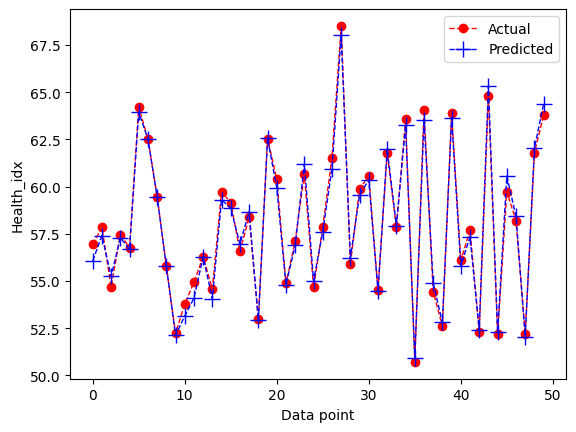

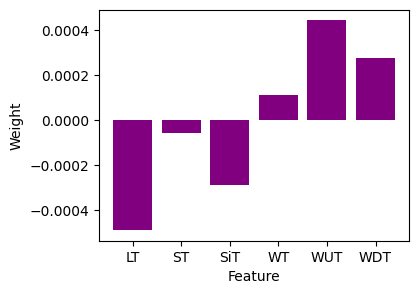

In [6]:
lr_c = LinearRegression().fit(x_train, y_train)
evaluate_regression(lr_c, "Linear Regression", x_train, x_test, y_train, y_test)

Training MAE BayesianRidge 0.2794700874415474, Test MAE BayesianRidge 0.2787970418615856
Training MSE BayesianRidge 0.12264380519377419, Test MSE BayesianRidge 0.12189292064822835
Training R2 BayesianRidge 0.9910289987027434, Test R2 BayesianRidge 0.9910660377236928


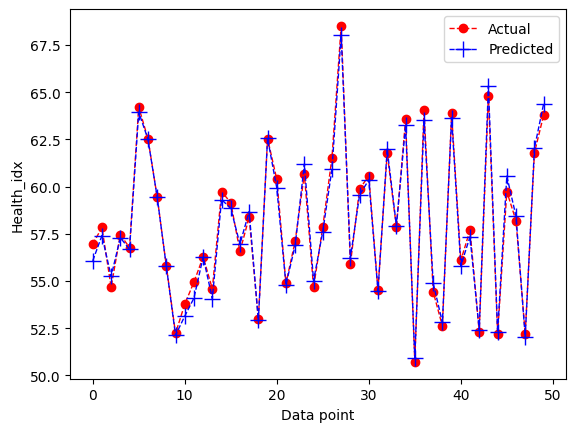

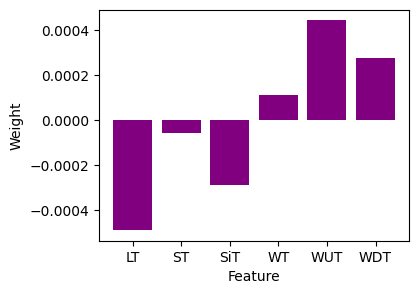

In [7]:
br_c = BayesianRidge().fit(x_train, y_train)
evaluate_regression(br_c, "BayesianRidge", x_train, x_test, y_train, y_test)

Training MAE Ridge 0.27947008734902207, Test MAE Ridge 0.2787970416150268
Training MSE Ridge 0.12264380519373945, Test MSE Ridge 0.1218929201364489
Training R2 Ridge 0.991028998702746, Test R2 Ridge 0.9910660377612031


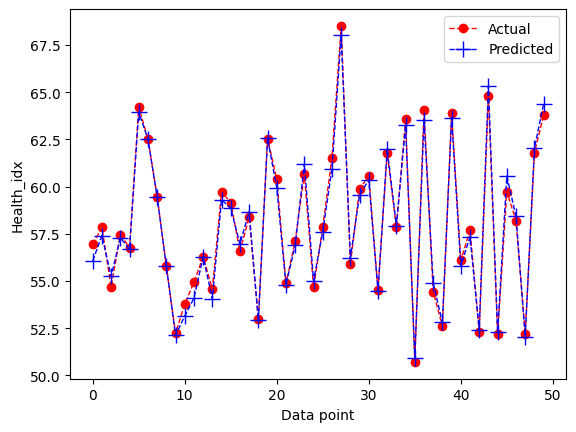

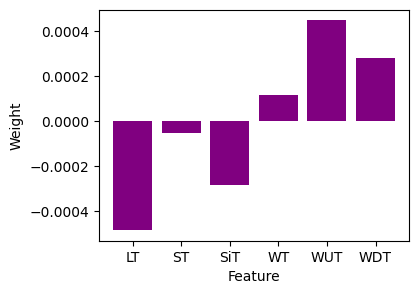

In [8]:
r_c = Ridge().fit(x_train, y_train)
evaluate_regression(r_c, "Ridge", x_train, x_test, y_train, y_test)

Training MAE Lasso 0.2794728291893878, Test MAE Lasso 0.2788016548330754
Training MSE Lasso 0.12264574778443399, Test MSE Lasso 0.12189905725323355
Training R2 Lasso 0.9910288566084624, Test R2 Lasso 0.9910655879502579


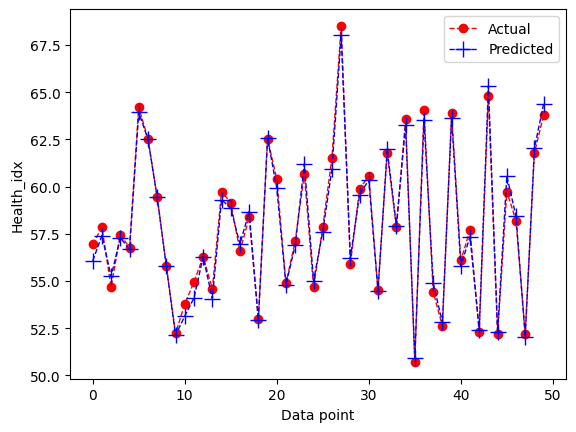

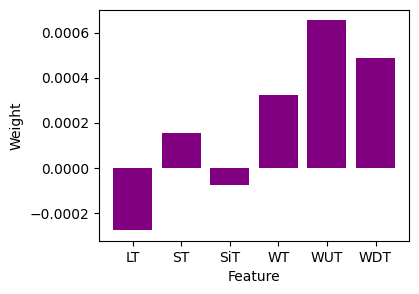

In [9]:
l_c = Lasso().fit(x_train, y_train)
evaluate_regression(l_c, "Lasso", x_train, x_test, y_train, y_test)

Training MAE ElasticNet 0.2794708781630836, Test MAE ElasticNet 0.27879871955803187
Training MSE ElasticNet 0.12264429138856286, Test MSE ElasticNet 0.12189550595098708
Training R2 ElasticNet 0.9910289631391528, Test R2 ElasticNet 0.991065848237731


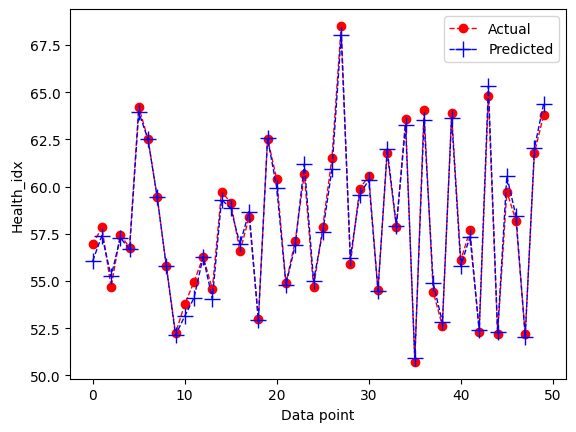

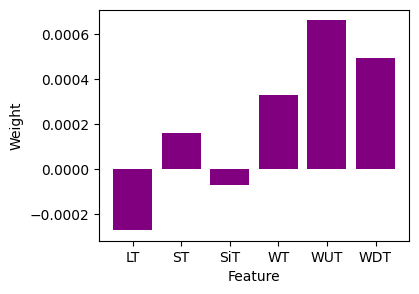

In [10]:
en_c = ElasticNet().fit(x_train, y_train)
evaluate_regression(en_c, "ElasticNet", x_train, x_test, y_train, y_test)

Training MAE ElasticNetCV 0.2814872682442472, Test MAE ElasticNetCV 0.2808683951051397
Training MSE ElasticNetCV 0.12441310313430247, Test MSE ElasticNetCV 0.12377363796655881
Training R2 ElasticNetCV 0.9908995802286946, Test R2 ElasticNetCV 0.9909281933149692


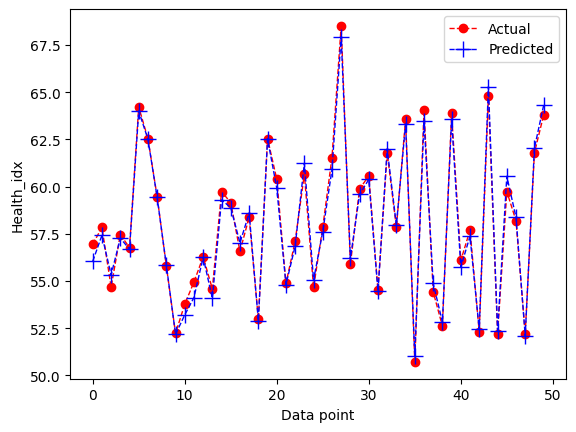

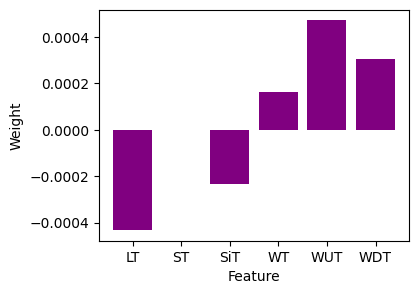

In [11]:
en_cv_c = ElasticNetCV().fit(x_train, y_train)
evaluate_regression(en_cv_c, "ElasticNetCV", x_train, x_test, y_train, y_test)

Training MAE HuberRegressor 0.2794700976307443, Test MAE HuberRegressor 0.27879707671357284
Training MSE HuberRegressor 0.12264381208325281, Test MSE HuberRegressor 0.12189284556559735
Training R2 HuberRegressor 0.9910289981988002, Test R2 HuberRegressor 0.9910660432267638


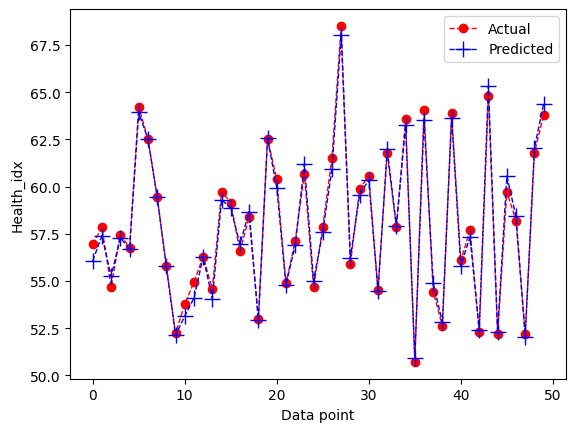

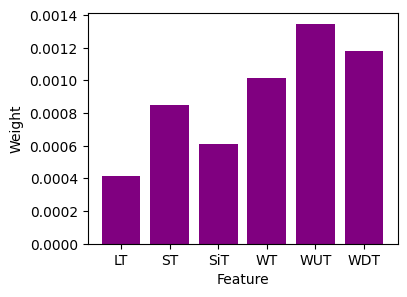

In [12]:
hr_c = HuberRegressor().fit(x_train, y_train)
evaluate_regression(hr_c, "HuberRegressor", x_train, x_test, y_train, y_test)

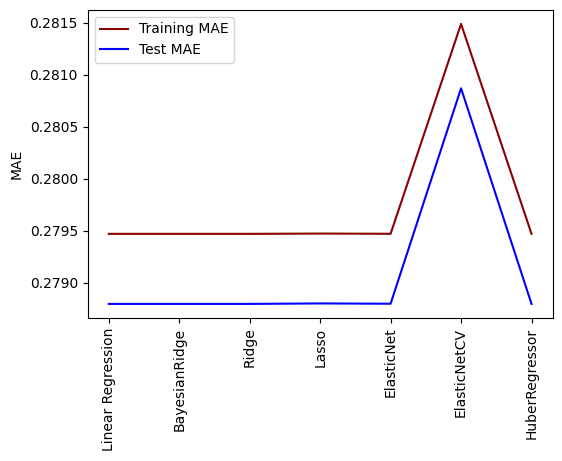

In [13]:
keys = [key for key in reg_kernal_evals.keys()]
values = [value for value in reg_kernal_evals.values()]
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.arange(len(keys)) , [value[0] for value in values], color='darkred')
ax.plot(np.arange(len(keys)) , [value[1] for value in values], color='b')
ax.legend(["Training MAE", "Test MAE"])
ax.set_xticklabels(keys, rotation='vertical')
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("MAE")
plt.show()

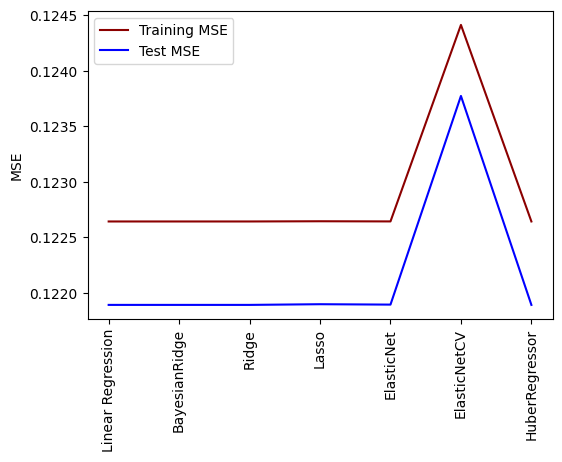

In [14]:
keys = [key for key in reg_kernal_evals.keys()]
values = [value for value in reg_kernal_evals.values()]
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.arange(len(keys)) , [value[2] for value in values], color='darkred')
ax.plot(np.arange(len(keys)) , [value[3] for value in values], color='b')
ax.legend(["Training MSE", "Test MSE"])
ax.set_xticklabels(keys, rotation='vertical')
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("MSE")
plt.show()

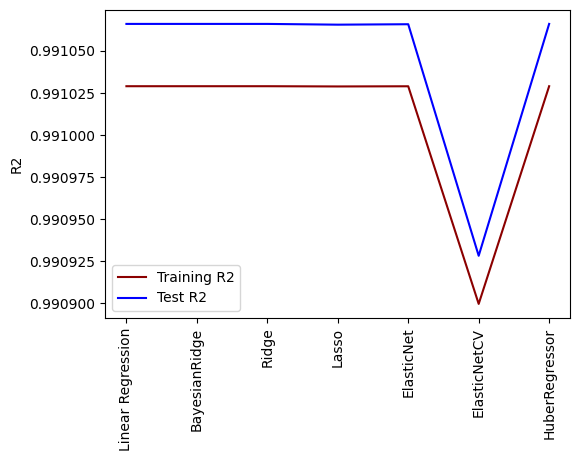

In [15]:
keys = [key for key in reg_kernal_evals.keys()]
values = [value for value in reg_kernal_evals.values()]
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.arange(len(keys)) , [value[4] for value in values], color='darkred')
ax.plot(np.arange(len(keys)) , [value[5] for value in values], color='b')
ax.legend(["Training R2", "Test R2"])
ax.set_xticklabels(keys, rotation='vertical')
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("R2")
plt.show()